# Final Project

In [204]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

### 需要用到的data，Orders.csv、PromotionOrders.csv

In [205]:
df_orders = pd.read_csv('Orders.csv')
df_promo = pd.read_csv('PromotionOrders.csv')

/Users/liuqieru/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [206]:
print(df_orders.columns)
print("\n")
print(df_promo.columns)

Index(['DateId', 'MemberId', 'OrderGroupCode', 'TrackSourceTypeDef',
       'TrackDeviceTypeDef', 'PayProfileTypeDef', 'SalesOrderSlaveId',
       'SalePageId', 'IsMajor', 'IsGift', 'IsSalePageGift', 'Quantity',
       'UnitPrice', 'PromotionDiscount', 'ECouponId', 'ECouponDiscount',
       'SalesOrderSlaveTotalPayment', 'SalesOrderSlaveDateTime',
       'SalesOrderReceiverId', 'City', 'District', 'ZipCode', 'StoreName',
       'StoreId', 'DeliverTypeDef', 'StatusDef', 'ReturnGoodsDateId',
       'CauseDef'],
      dtype='object')


Index(['SalesOrderSlaveId', 'PromotionId', 'SalesOrderSlavePromotionDiscount',
       'SalesOrderSlavePromotionDiscountAllocated',
       'SalesOrderSlavePromotionDiscountAllocatedQty',
       'SalesOrderSlavePromotionDiscountRate', 'DiscountType',
       'PromotionCondition_DiscountPrice', 'PromotionCondition_DiscountRate',
       'PromotionCondition_TotalPrice', 'PromotionCondition_TotalQty',
       'PromotionStartDateTime', 'PromotionEndDateTime'],
     

## 折扣類型

In [207]:
df_promo['DiscountType'].unique()

array(['滿額折現', '滿件打折', '任選優惠價', '滿額贈', '會員滿額打折', '滿件折現', '滿額打折'],
      dtype=object)

## 想看滿額金額與折扣類型(滿額折現,滿額打折)的關係

In [208]:
df_promo = df_promo[(df_promo['DiscountType'] == '滿額折現') | (df_promo['DiscountType'] == '滿額打折')]

In [209]:
df_promo['PromotionCondition_TotalPrice'].unique()

array([1000.,  666., 1200.,  299.,  899.,  800., 1500.,  888.,  399.,
       1111.,  799.,  777.])

In [210]:
df_promo_tot = df_promo[df_promo['PromotionCondition_TotalPrice'].notnull()]
df_promo_tot.head()

SalesOrderSlaveId  PromotionId  SalesOrderSlavePromotionDiscount  \
0           40086585        62671                             100.0   
1           40088089        62671                             100.0   
2           40090756        62671                             100.0   
3           40090763        62671                             100.0   
4           40091003        62671                             100.0   

   SalesOrderSlavePromotionDiscountAllocated  \
0                                      -12.0   
1                                      -12.0   
2                                      -12.0   
3                                      -12.0   
4                                      -12.0   

   SalesOrderSlavePromotionDiscountAllocatedQty  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   SalesOrderSlavePromotionDiscountRate DiscountType  \
0                                   0.0         滿額折現   
1                                   0.0         滿額折現   
2                                   0.0         滿額折現   
3                                   0.0         滿額折現   
4                                   0.0         滿額折現   

   PromotionCondition_DiscountPrice  PromotionCondition_DiscountRate  \
0                             100.0                              0.0   
1                             100.0                              0.0   
2                             100.0                              0.0   
3                             100.0                              0.0   
4                             100.0                              0.0   

   PromotionCondition_TotalPrice  PromotionCondition_TotalQty  \
0                         1000.0                            0   
1                         1000.0                            0   
2                         1000.0                            0   
3                         1000.0                            0   
4                         1000.0                            0   

    PromotionStartDateTime     PromotionEndDateTime  
0  2017-07-10 11:00:00.000  2017-07-31 10:59:00.000  
1  2017-07-10 11:00:00.000  2017-07-31 10:59:00.000  
2  2017-07-10 11:00:00.000  2017-07-31 10:59:00.000  
3  2017-07-10 11:00:00.000  2017-07-31 10:59:00.000  
4  2017-07-10 11:00:00.000  2017-07-31 10:59:00.000

In [211]:
df_promo_tot = df_promo_tot[['SalesOrderSlaveId','DiscountType','PromotionCondition_TotalPrice']]
df_promo_tot.head()

SalesOrderSlaveId DiscountType  PromotionCondition_TotalPrice
0           40086585         滿額折現                         1000.0
1           40088089         滿額折現                         1000.0
2           40090756         滿額折現                         1000.0
3           40090763         滿額折現                         1000.0
4           40091003         滿額折現                         1000.0

In [212]:
df_orders = df_orders[['OrderGroupCode','SalesOrderSlaveId','MemberId', 'Quantity','UnitPrice','SalesOrderSlaveTotalPayment','PromotionDiscount','StatusDef']]
df_orders.head()

OrderGroupCode  SalesOrderSlaveId  \
0  b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...            4457777   
1  b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...            4457778   
2  b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...            4457779   
3  b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...            4457780   
4  b"\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...            4457791   

   MemberId  Quantity  UnitPrice  SalesOrderSlaveTotalPayment  \
0   1388133         1      350.0                        350.0   
1   1388133         1      199.0                        199.0   
2   1388133         1      199.0                        199.0   
3   1388133         1      225.0                        225.0   
4    365787         1      100.0                        100.0   

   PromotionDiscount StatusDef  
0                0.0    Finish  
1                0.0    Finish  
2                0.0    Finish  
3                0.0    Finish  
4                0.0    Finish

In [213]:
df = pd.merge(df_promo_tot,df_orders, how='left', on='SalesOrderSlaveId')
df.head()

SalesOrderSlaveId DiscountType  PromotionCondition_TotalPrice  \
0           40086585         滿額折現                         1000.0   
1           40088089         滿額折現                         1000.0   
2           40090756         滿額折現                         1000.0   
3           40090763         滿額折現                         1000.0   
4           40091003         滿額折現                         1000.0   

                                      OrderGroupCode  MemberId  Quantity  \
0  b'!\x96P\x13\xc6\xed\xdb\xe7\xc7\x01\xefz\xe8\...  779715.0       1.0   
1  b'$\xf5LTr\x86\xaf\x1c\xbc\x8c\xed\xbcD\x9cw\x...  607036.0       1.0   
2  b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...  801590.0       1.0   
3  b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...  801590.0       1.0   
4  b'\xca\xe2\xaa3m\xc6\xc0/\x8d\xb9\xaa\x9b\xff\...   32633.0       1.0   

   UnitPrice  SalesOrderSlaveTotalPayment  PromotionDiscount StatusDef  
0      320.0                        308.0              -12.0    Cancel  
1      180.0                        168.0              -12.0    Finish  
2      199.0                        187.0              -12.0    Cancel  
3      295.0                        283.0              -12.0    Cancel  
4      250.0                        238.0              -12.0   Overdue

## 資料篩選出狀態完成的訂單

In [214]:
df_fin = df[df['StatusDef'] == 'Finish']

In [215]:
print("滿額折現(或滿額打折)/折扣訂單總數：", df['OrderGroupCode'].nunique())
print("滿額折現(或滿額打折)/折扣訂單完成數：", df_fin['OrderGroupCode'].nunique())
print("滿額折現(或滿額打折)/折扣訂單完成率：", df_fin['OrderGroupCode'].nunique()/df['OrderGroupCode'].nunique())

滿額折現(或滿額打折)/折扣訂單總數： 306105
滿額折現(或滿額打折)/折扣訂單完成數： 238518
滿額折現(或滿額打折)/折扣訂單完成率： 0.7792032145832313


## 滿額折現(或滿額打折)的訂單完成率約78%，可再與其他優惠比較訂單完成率

In [216]:
df_new = df_fin.groupby(by=['OrderGroupCode','PromotionCondition_TotalPrice'])['SalesOrderSlaveTotalPayment','PromotionDiscount'].sum()
df_new.head()

SalesOrderSlaveTotalPayment  \
OrderGroupCode                                     PromotionCondition_TotalPrice                                
b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x... 899.0                                               1583.0   
b" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\x... 800.0                                                697.0   
b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa0... 800.0                                               2042.0   
                                                   1200.0                                              2042.0   
b" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\xd... 1500.0                                              1051.0   

                                                                                  PromotionDiscount  
OrderGroupCode                                     PromotionCondition_TotalPrice                     
b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x... 899.0                                     -100.0  
b" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\x... 800.0                                     -352.0  
b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa0... 800.0                                     -390.0  
                                                   1200.0                                    -390.0  
b" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\xd... 1500.0                                     -96.0

把index變成column

In [217]:
df_new = df_new.reset_index()
df_new.reset_index(inplace=True)

In [218]:
df_new.head()

index                                     OrderGroupCode  \
0      0  b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\...   
1      1  b" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\...   
2      2  b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...   
3      3  b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...   
4      4  b" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\x...   

   PromotionCondition_TotalPrice  SalesOrderSlaveTotalPayment  \
0                          899.0                       1583.0   
1                          800.0                        697.0   
2                          800.0                       2042.0   
3                         1200.0                       2042.0   
4                         1500.0                       1051.0   

   PromotionDiscount  
0             -100.0  
1             -352.0  
2             -390.0  
3             -390.0  
4              -96.0

計算獲利

In [219]:
df_new['NetProfit'] =  df_new['SalesOrderSlaveTotalPayment']-df_new['PromotionCondition_TotalPrice']

In [220]:
df_new['PromotionCondition_TotalPrice'].unique()

array([ 899.,  800., 1200., 1500.,  666., 1000.,  888., 1111.,  299.,
        799.,  399.,  777.])

## 將折扣條件：以滿額金額分類，分別以X軸為成本，Y軸為篩選的折扣活動獲利  來進行視覺化

In [221]:
df299 = df_new[df_new['PromotionCondition_TotalPrice']==299.]
df399 = df_new[df_new['PromotionCondition_TotalPrice']==399.]
df666 = df_new[df_new['PromotionCondition_TotalPrice']==666.]
df777 = df_new[df_new['PromotionCondition_TotalPrice']==777.]
df799 = df_new[df_new['PromotionCondition_TotalPrice']==799.]
df800 = df_new[df_new['PromotionCondition_TotalPrice']==800.]
df888 = df_new[df_new['PromotionCondition_TotalPrice']==888.]
df899 = df_new[df_new['PromotionCondition_TotalPrice']==899.]
df1000 = df_new[df_new['PromotionCondition_TotalPrice']==1000.]
df1111 = df_new[df_new['PromotionCondition_TotalPrice']==1111.]
df1200 = df_new[df_new['PromotionCondition_TotalPrice']==1200.]
df1500 = df_new[df_new['PromotionCondition_TotalPrice']==1500.]

In [224]:
import matplotlib.pyplot as plt
price = [df299,df399,df666,df777,df799,df800,df888,df899,df1000,df1111,df1200,df1500]
name = ['PromotionCondition_TotalPrice:299','PromotionCondition_TotalPrice:399','PromotionCondition_TotalPrice:666','PromotionCondition_TotalPrice:777','PromotionCondition_TotalPrice:799','PromotionCondition_TotalPrice:800','PromotionCondition_TotalPrice:888','PromotionCondition_TotalPrice:899','PromotionCondition_TotalPrice:1000','PromotionCondition_TotalPrice:1111','PromotionCondition_TotalPrice:1200','PromotionCondition_TotalPrice:1500']

1


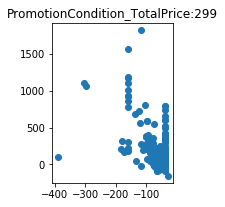

2


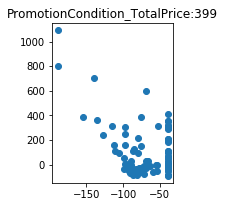

3


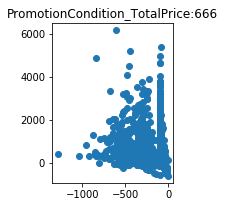

4


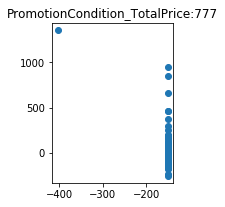

5


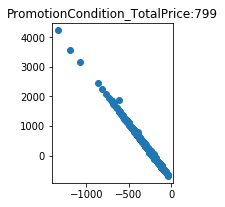

6


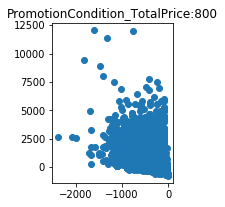

7


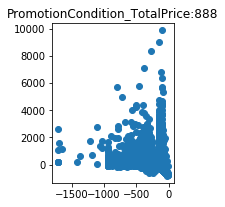

8


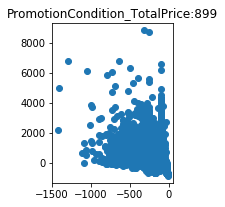

9


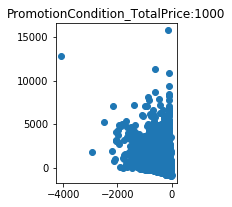

10


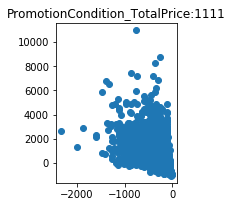

11


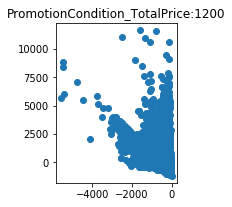

12


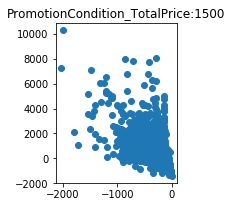

In [225]:
for i in range(1,len(price)+1):
    print(i)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(3,4,i)
    ax.plot(price[i-1]['PromotionDiscount'], price[i-1]['NetProfit'],'o')
    ax.set_title(str(name[i-1]))
    plt.show()  # 展示 

## 結論：可以看出在滿額金額達800以上的分布趨勢類似，獲利大於成本，獲利多集中在0~2000之間，成本集中在1000元以下因此活動類型滿額贈或滿額打折，對他們是很有吸引力的